In [1]:
import re
import os
import matplotlib
import nltk
from nltk.corpus import PlaintextCorpusReader

# Aufgabe 1
Wir bauen uns ein Korpus . . .
- Wählen Sie mindestens 4 Online-Artikel aus, die aus unterschiedlichen Zei-
tungsportalen stammen oder unterschiedlichen Genres zuzurechnen sind.
Speichern Sie diese Artikel anschließend als reine Textdateien (Kodierung: UTF-8).
- Erzeugen Sie ein Korpus, das diese Texte enthält (PlaintextCorpusReader).

Arbeitsverzeichnis laden und in den  Unterordner '/data' gehen:

In [2]:
corpus_dir = os.getcwd() + "/data"

Alle txt-Dateien (ausser Stoppworte.txt) in '/data' matchen:

In [3]:
corpus_texts = ".+\.txt"

Texte als Korpus der Variable 'mein_korpus' zuweisen:

In [4]:
mein_korpus = PlaintextCorpusReader(corpus_dir, corpus_texts, encoding='utf-8')

Überprüfen ob Korpusbildung erfolgreich war:

In [5]:
print(mein_korpus.fileids())

['bushido.txt', 'corbyn.txt', 'corona.txt', 'stoppworte.txt', 'trump.txt']


# Aufgabe 2.1
Berechnen Sie die Länge in Token und den Vokabularumfang (Types).

Die Texte in ein Dictionary ablegen:

In [6]:
corpus_dict = {
    "Trump" : mein_korpus.words('trump.txt'),
    "Bushido" : mein_korpus.words('bushido.txt'),
    "Corbyn" : mein_korpus.words('corbyn.txt'),
    "Corona" : mein_korpus.words('corona.txt')
}

Variable 'all' für alle Texte im Korpus anlegen:

In [7]:
all = corpus_dict["Trump"] + corpus_dict["Bushido"] + corpus_dict["Corbyn"] + corpus_dict["Corona"]

Den gesamten Korpus als Schlüssel ablegen:

In [8]:
corpus_dict.update({'Korpus' : all})

Länge und Umfang der Texte drucken in dem ich durch das Dictionary iteriere:

In [12]:
for text in corpus_dict:
    print(' ' + text + ':', '\tLänge:', len(corpus_dict[text]), '\tUmfang:', len(set(corpus_dict[text])))

 Trump: 	Länge: 1285 	Umfang: 545
 Bushido: 	Länge: 617 	Umfang: 301
 Corbyn: 	Länge: 427 	Umfang: 249
 Corona: 	Länge: 820 	Umfang: 435
 Korpus: 	Länge: 3149 	Umfang: 1187


# Aufgabe 2.2
Erstellen Sie eine Frequenzliste und lassen Sie sich die 10 häufigsten Wörter anzeigen:

### inkl. Stopwörtern

In [20]:
for text in corpus_dict:
    fd = nltk.FreqDist(corpus_dict[text])
    print(text + ':', fd.most_common(10), '\n')

Trump: [(',', 74), ('.', 59), ('der', 31), ('die', 26), ('Trump', 24), ('in', 21), ('Biden', 21), ('-', 20), ('sich', 16), ('und', 16)] 

Bushido: [('.', 30), (',', 27), ('Bushido', 15), ('-', 14), ('der', 14), ('Abou', 13), ('Chaker', 11), ('habe', 11), ('und', 10), ('„', 8)] 

Corbyn: [(',', 19), ('.', 19), ('der', 15), ('die', 10), ('in', 8), ('-', 7), ('und', 7), ('Corbyn', 6), ('Labour', 6), ('„', 6)] 

Corona: [(',', 59), ('.', 36), ('die', 22), ('der', 15), ('in', 15), ('-', 14), ('?', 11), (':', 10), ('wird', 9), ('werden', 8)] 

Korpus: [(',', 179), ('.', 144), ('der', 75), ('die', 63), ('-', 55), ('in', 52), ('und', 41), ('zu', 31), (':', 31), ('sich', 29)] 



### ohne Stoppwörter

Stoppwörter aus ihrer txt-Datei in Variable lesen:

In [16]:
stoppworte = mein_korpus.words('stoppworte.txt')

In [19]:
for text in corpus_dict:
    # Erzeuge eine Liste aus dem jeweiligen Text
    wortliste = list(corpus_dict[text])
    # Entferne Wörter kürzer als drei Buchstaben
    wortliste = [wort for wort in wortliste if len(wort) > 3]
    # Entferne Stoppwörter die in 'stoppworte.txt' enthalten sind
    wortliste = [wort for wort in wortliste if wort not in stoppworte]
    # Erzeuge Häufigkeitsverteilung
    fd = nltk.FreqDist(wortliste)
    # Drucke die 10 häufigsten Wörter
    print(text + ':', fd.most_common(10), '\n')

Trump: [('Trump', 24), ('Biden', 21), ('nicht', 11), ('Duell', 7), ('schon', 7), ('Bidens', 7), ('Hunter', 7), ('Trumps', 6), ('Sohn', 6), ('Wähler', 5)] 

Bushido: [('Bushido', 15), ('Abou', 13), ('Chaker', 11), ('soll', 8), ('Treffen', 5), ('2017', 4), ('Mittwoch', 4), ('Rapper', 3), ('Arafat', 3), ('wollte', 3)] 

Corbyn: [('Corbyn', 6), ('Labour', 6), ('Starmer', 5), ('Jeremy', 4), ('nicht', 4), ('Keir', 4), ('EHRC', 4), ('Antisemitismus', 4), ('Partei', 3), ('Suspendierung', 3)] 

Corona: [('nicht', 6), ('Impfstoffe', 5), ('bald', 4), ('erste', 4), ('Impfstoff', 4), ('Kann', 3), ('SPIEGEL', 3), ('Sahin', 3), ('schützen', 3), ('Wochen', 3)] 

Korpus: [('Trump', 24), ('nicht', 24), ('Biden', 21), ('Bushido', 15), ('Abou', 13), ('Chaker', 11), ('schon', 10), ('noch', 9), ('soll', 9), ('Duell', 7)] 



# Aufgabe 3
Erzeugen Sie für jeden Text eine Grafik, die zeigt, wie groß der Anteil der häufigsten Wörter am Gesamttext sind (kummulative Werte). Diskutieren Sie anhand
der für die Bearbeitung des Aufgabenblatts berechneten Werte Unterschiede
zwischen verschiedenen Texten.

### inkl. Stoppwörtern

Trump:


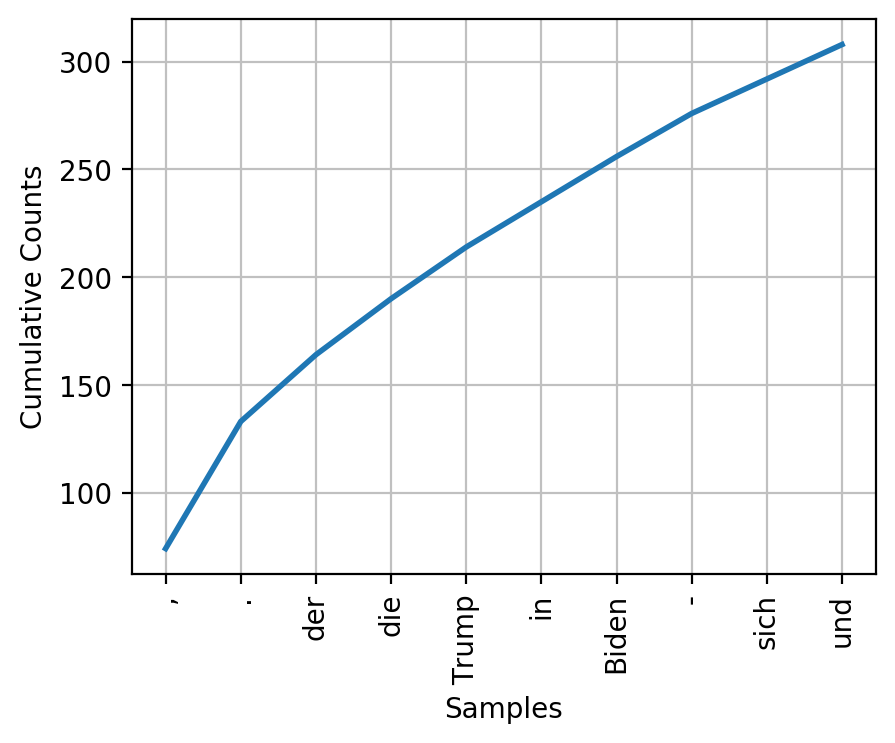

Bushido:


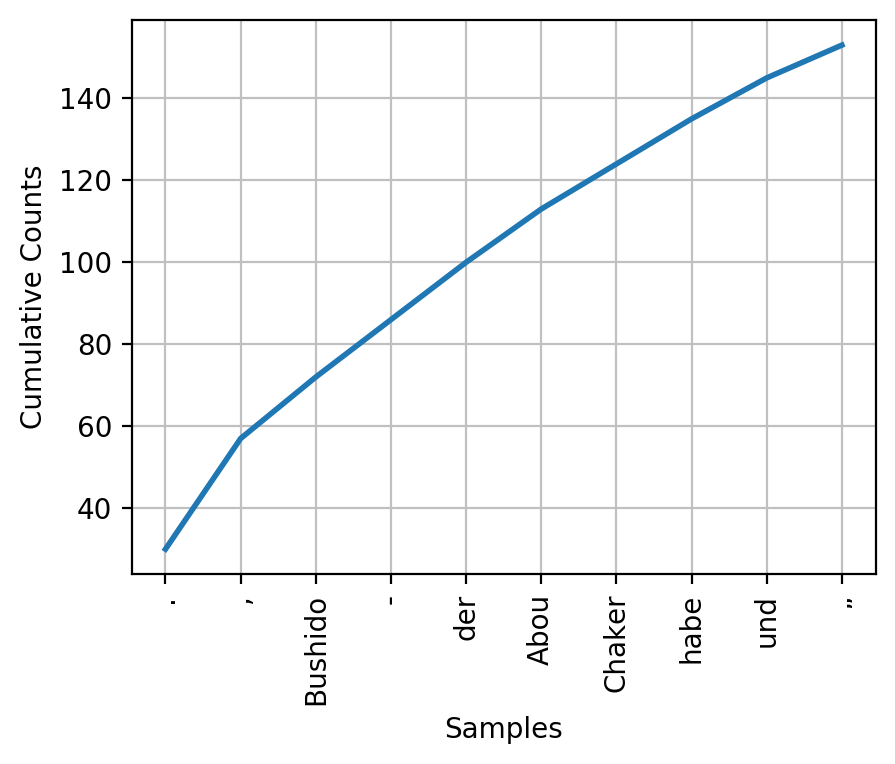

Corbyn:


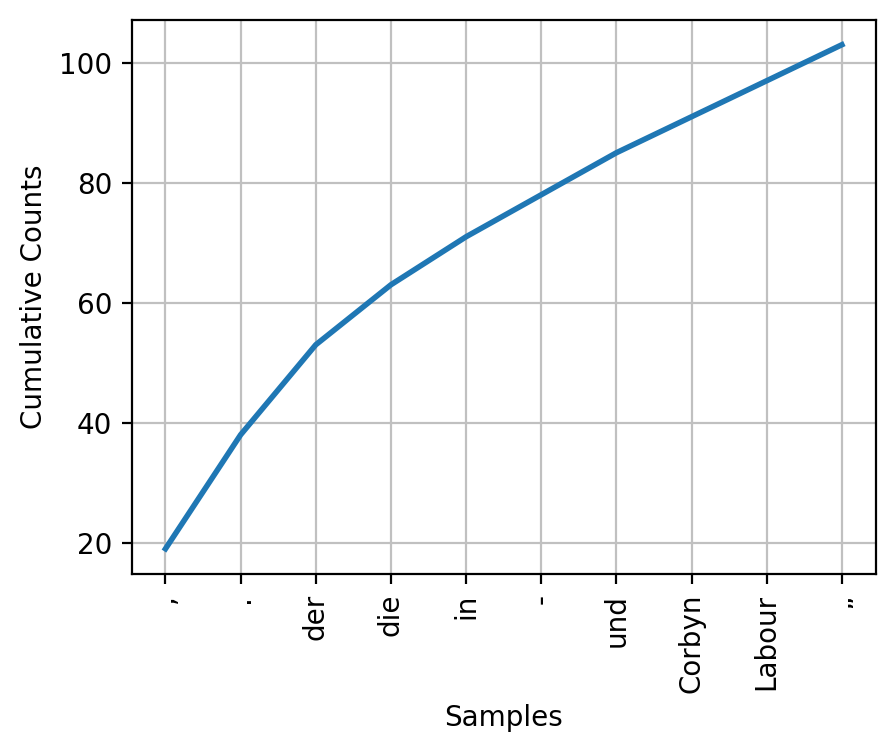

Corona:


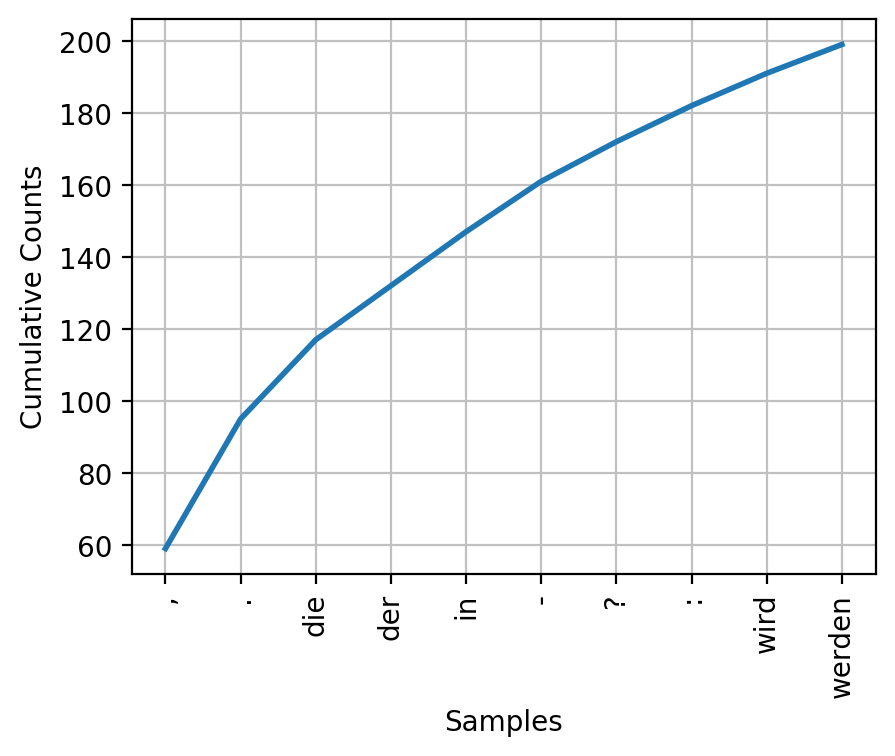

Korpus:


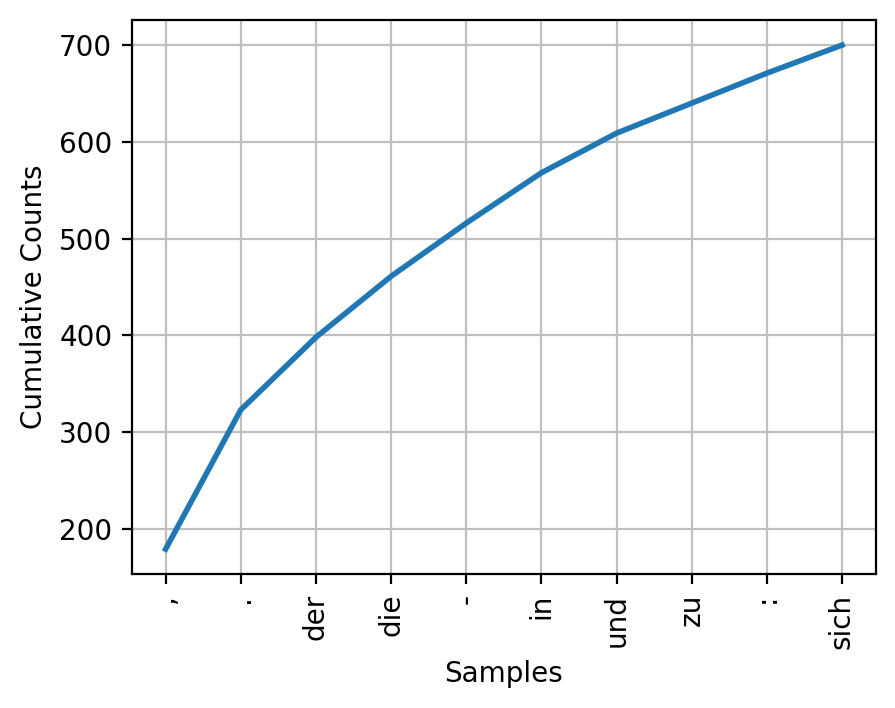

In [22]:
for text in corpus_dict:
    fd = nltk.FreqDist(corpus_dict[text])
    print(text + ':')
    fd.plot(10, cumulative=True)

### ohne Stoppwörter

Trump:


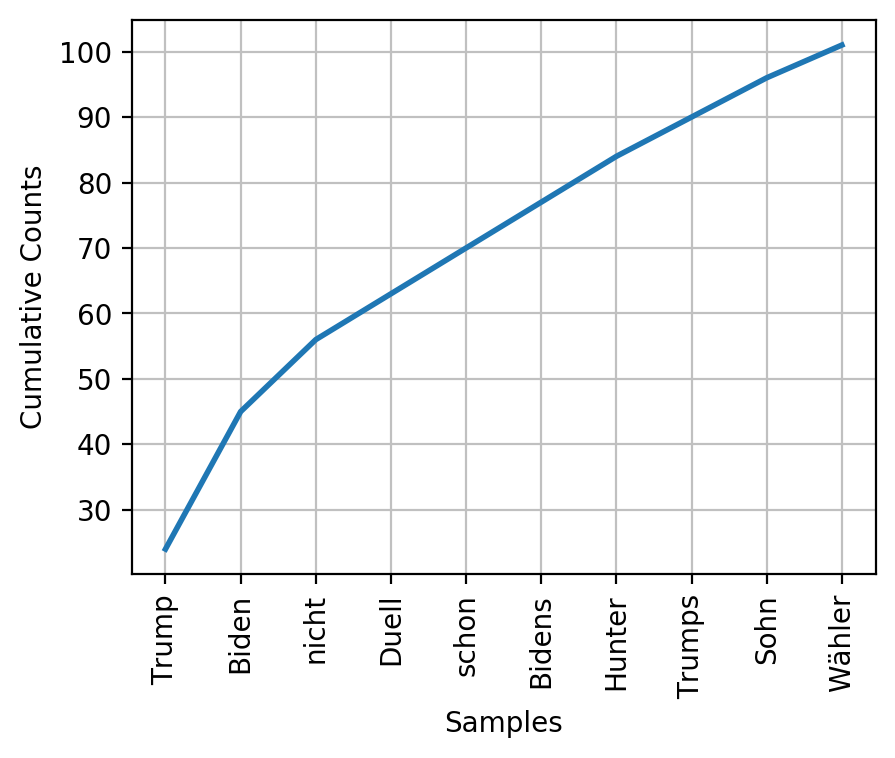

Bushido:


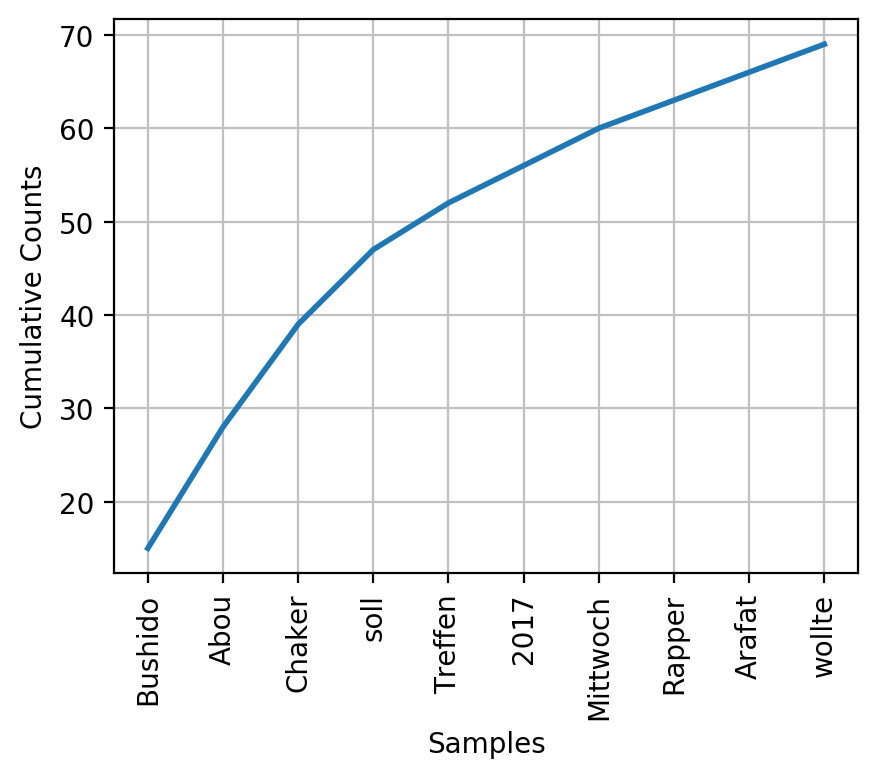

Corbyn:


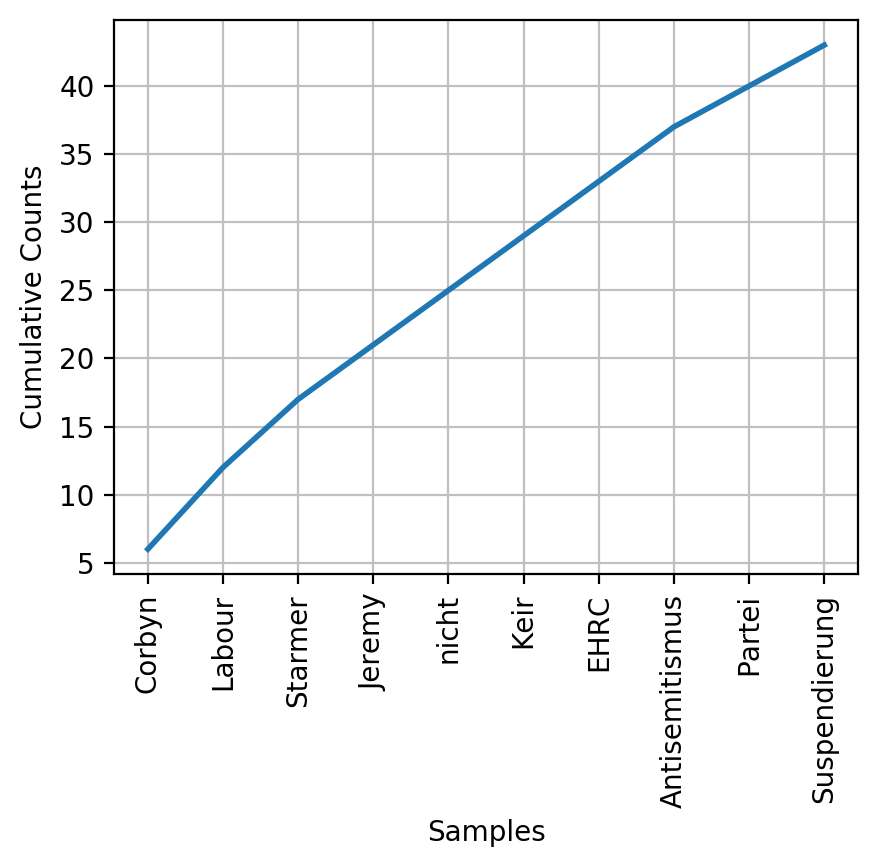

Corona:


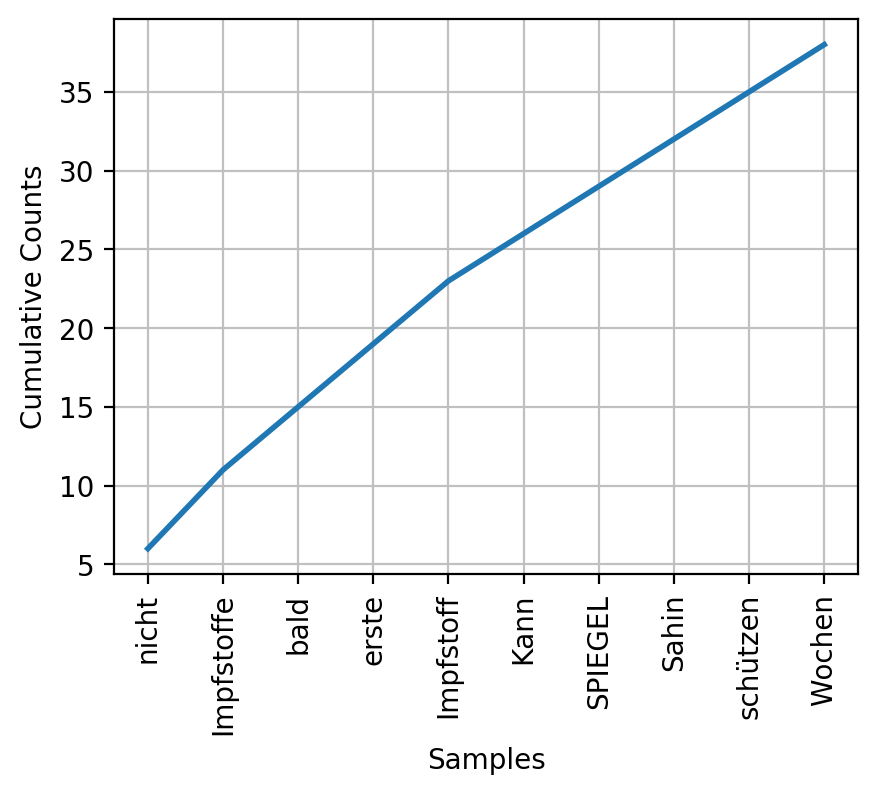

Korpus:


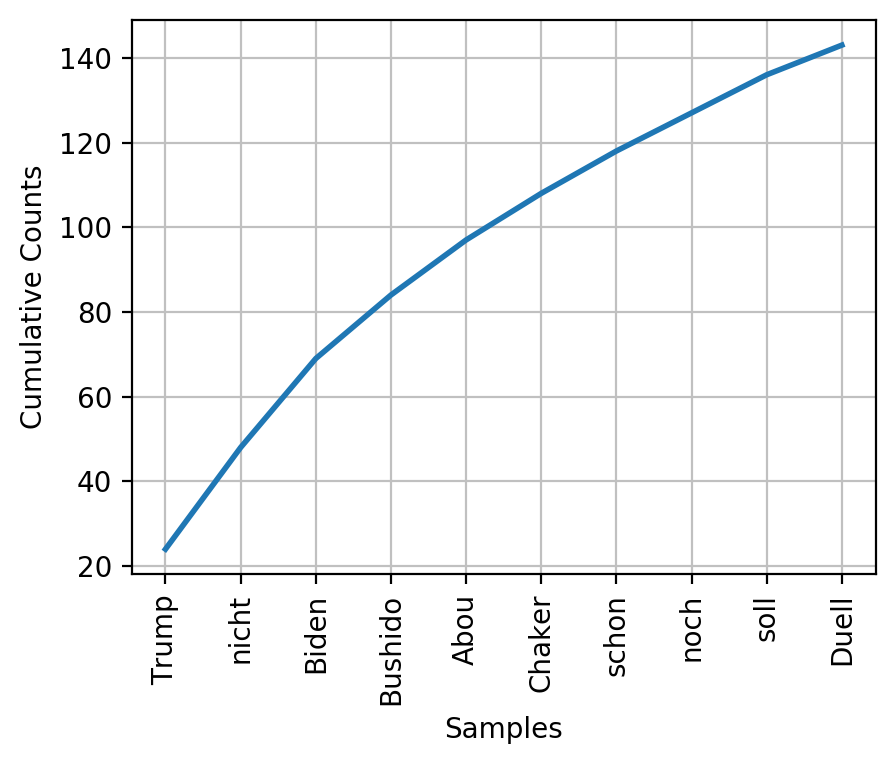

In [16]:
for text in corpus_dict:
    wortliste = list(corpus_dict[text])
    wortliste = [wort for wort in wortliste if len(wort) > 3]
    wortliste = [wort for wort in wortliste if wort not in stoppworte]
    fd = nltk.FreqDist(wortliste)
    print(text + ":")
    fd.plot(10, cumulative=True)

## Fazit
In den (von Stoppwörtern) **unbereinighten Häufigkeitsverteilungen bis 10 Wörter** kann kaum eine Aussage über den Textinhalt gemacht werden, da diese fast ausschliesslich aus Stoppworten bestehen.  
Erst **nach Bereinigung** kann eine ungefähre Aussage über den Textinhalt gemacht werden. So können mäglicherweise Tags generiert werden.